In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

## Partimos de los datos genereados por Notebook creacionFeatures

In [2]:
df_train = pd.read_csv('../data/train_con_features.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features.csv', index_col='Unnamed: 0')

In [3]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'provincia_top5', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa',
       'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial',
       'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio',
       'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial',
       'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex',
       'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compar

### Eliminamos los features generados relacionados con TipoPropiedad

In [4]:
lst_tipos_propiedades = ['es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno',
                         'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional',
                         'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo',
                         'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros',
                         'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos',
                         'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho',
                         'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage']

df_train = df_train.drop(lst_tipos_propiedades, axis=1)
df_test = df_test.drop(lst_tipos_propiedades, axis=1)
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'provincia_top5', 'seguridad_descripcion', 'moderno_descripcion',
       'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo',
       'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
       'cantidad_palabras_descripcion', 'relacion_palabras_descripcion',
       'es_avenida', 'es_ciudad_capital', 'ciudad_turistica_top15', 'anio',
       'mes'],
      dtype='object')

### Eliminamos features repetidos y complejos

In [5]:
drop = ['titulo', 'descripcion', 'direccion', 'fecha']

df_train = df_train.drop(drop, axis=1)
df_test = df_test.drop(drop, axis=1)
df_train.head()

,id,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,...,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes
0,254099,Apartamento,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,2.0,80.0,80.0,...,0,0,0,0,0.000000,1,0,0,2015,8
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,2.0,268.0,180.0,...,0,0,0,1,0.007968,1,0,0,2013,6
2,247984,Casa,Tonalá,Jalisco,5.000000,3.0,2.0,2.0,144.0,166.0,...,0,0,0,10,0.046957,0,0,0,2015,10
3,209067,Casa,Zinacantepec,Edo. de México,1.000000,2.0,1.0,1.0,63.0,67.0,...,0,0,0,0,0.000000,0,0,0,2012,3
4,185997,Apartamento,Zapopan,Jalisco,10.000000,2.0,1.0,1.0,95.0,95.0,...,0,0,0,1,0.074108,0,0,0,2016,6


In [6]:
df_train.shape

(240000, 45)

### Agregamos más features relacionados al precio

In [7]:
precio_promedio_general = df_train.precio.mean()

#### Precio promedio según antiguedad

Creonuevo fueature con buckets de antiguedad cada 4 años

In [8]:
df_train['antiguedad_dividido_4'] = df_train.antiguedad // 4
df_test['antiguedad_dividido_4'] = df_test.antiguedad // 4

precio_promedio_por_antiguedad = df_train.groupby('antiguedad_dividido_4').agg({'precio':'mean'}).T.to_dict('list')

def obtener_precio_promedio_por_antiguedad(bucket_antiguedad):
    return precio_promedio_por_antiguedad[bucket_antiguedad][0]

df_train['precio_prom_antiguedad'] = df_train['antiguedad_dividido_4'].apply(obtener_precio_promedio_por_antiguedad)
df_test['precio_prom_antiguedad'] = df_test['antiguedad_dividido_4'].apply(obtener_precio_promedio_por_antiguedad)
#df_test['precio_prom_antiguedad'].value_counts()

#### Precio promedio según habitaciones

In [9]:
precio_promedio_por_habitaciones = df_train.groupby('habitaciones').agg({'precio':'mean'}).T.to_dict('list')

def obtener_precio_promedio_por_habitaciones(habitaciones):
    if habitaciones in precio_promedio_por_habitaciones:
        return precio_promedio_por_habitaciones[habitaciones][0]
    return precio_promedio_general

df_train['precio_prom_habitaciones'] = df_train['habitaciones'].apply(obtener_precio_promedio_por_habitaciones)
df_test['precio_prom_habitaciones'] = df_test['habitaciones'].apply(obtener_precio_promedio_por_habitaciones)

#### Precio promedio según metros cubiertos

Creo nuevo feature con buckets cada 5 metros cubiertos

In [10]:
df_train['metroscubiertos_dividido_5'] = df_train.metroscubiertos // 5
df_test['metroscubiertos_dividido_5'] = df_test.metroscubiertos // 5

precio_promedio_por_metroscubiertos = df_train.groupby('metroscubiertos_dividido_5').agg({'precio':'mean'}).T.to_dict('list')

def obtener_precio_promedio_por_metroscubiertos(bucket_metroscubiertos):
    return precio_promedio_por_metroscubiertos[bucket_metroscubiertos][0]

df_train['precio_prom_metroscubiertos'] = df_train['metroscubiertos_dividido_5'].apply(obtener_precio_promedio_por_metroscubiertos)
df_test['precio_prom_metroscubiertos'] = df_test['metroscubiertos_dividido_5'].apply(obtener_precio_promedio_por_metroscubiertos)
#df_test['precio_prom_metroscubiertos'].value_counts()

## Aplicamos encodings a los features categoricos

In [11]:
import category_encoders as ce

#Elegimos un metodo de encode para estos features, y comentamos el resto de los metodos
cat_features = ['tipodepropiedad', 'ciudad', 'provincia']

#O elegimos distintos metodos dependiendo del feature
cb_features = ['ciudad']                         #Features p usar catboost encode
oh_features = ['tipodepropiedad', 'provincia']   #Features p usar one hot encoding


### CatBoost Encoding

In [12]:
catb_enc = ce.CatBoostEncoder(cols=cat_features)
catb_enc.fit(df_train[cat_features], df_train['precio'])

df_train = df_train.join(catb_enc.transform(df_train[cat_features]).add_suffix('_cb'))
df_test = df_test.join(catb_enc.transform(df_test[cat_features]).add_suffix('_cb'))

### Target Encoding

In [13]:
'''target_enc = ce.TargetEncoder(cols=cat_features)
target_enc.fit(df_train[cat_features], df_train['precio'])

df_train = df_train.join(target_enc.transform(df_train[cat_features]).add_suffix('_target'))
df_test = df_test.join(target_enc.transform(df_test[cat_features]).add_suffix('_target'))'''

"target_enc = ce.TargetEncoder(cols=cat_features)\ntarget_enc.fit(df_train[cat_features], df_train['precio'])\n\ndf_train = df_train.join(target_enc.transform(df_train[cat_features]).add_suffix('_target'))\ndf_test = df_test.join(target_enc.transform(df_test[cat_features]).add_suffix('_target'))"

### Count Encoding

In [14]:
#NO USAR!! GENERA OVERFITING
'''count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(df_train[cat_features])

df_train = df_train.join(count_encoded.add_suffix("_count"))
df_test = df_test.join(count_encoded.add_suffix("_count"))'''

'count_enc = ce.CountEncoder()\ncount_encoded = count_enc.fit_transform(df_train[cat_features])\n\ndf_train = df_train.join(count_encoded.add_suffix("_count"))\ndf_test = df_test.join(count_encoded.add_suffix("_count"))'

### Binary Encoding

In [15]:
'''binary_enc = ce.BinaryEncoder()
binary_encoded = binary_enc.fit_transform(df_train[cat_features])

df_train = df_train.join(binary_encoded.add_suffix("_binary"))
df_test = df_test.join(binary_encoded.add_suffix("_binary"))'''

'binary_enc = ce.BinaryEncoder()\nbinary_encoded = binary_enc.fit_transform(df_train[cat_features])\n\ndf_train = df_train.join(binary_encoded.add_suffix("_binary"))\ndf_test = df_test.join(binary_encoded.add_suffix("_binary"))'

### One Hot Encoding

In [16]:
'''one_hot_enc = ce.OneHotEncoder()
one_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])

df_train = df_train.join(one_hot_encoded.add_suffix("_oh"))
df_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'''

'one_hot_enc = ce.OneHotEncoder()\none_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])\n\ndf_train = df_train.join(one_hot_encoded.add_suffix("_oh"))\ndf_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'

In [17]:
df_train.shape

(240000, 53)

In [18]:
df_test.shape

(60000, 51)

In [19]:
#Dropeamos los features con strings ya encodeados
#Dejamos los dataset listos para modelar

df_train = df_train.drop(cat_features, axis=1)
df_test = df_test.drop(cat_features, axis=1)

## Feature Selection

In [20]:
from catboost import CatBoostRegressor

feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

CatBoost = CatBoostRegressor(loss_function='MAE')
CatBoost_fit = CatBoost.fit(X, y)

0:	learn: 1489015.7842888	total: 139ms	remaining: 2m 19s
1:	learn: 1460616.7027215	total: 216ms	remaining: 1m 47s
2:	learn: 1434464.2739623	total: 294ms	remaining: 1m 37s
3:	learn: 1409409.8558275	total: 373ms	remaining: 1m 32s
4:	learn: 1384911.6644799	total: 451ms	remaining: 1m 29s
5:	learn: 1361463.9109691	total: 532ms	remaining: 1m 28s
6:	learn: 1338647.0567724	total: 622ms	remaining: 1m 28s
7:	learn: 1316999.5113300	total: 703ms	remaining: 1m 27s
8:	learn: 1295250.5118208	total: 794ms	remaining: 1m 27s
9:	learn: 1274354.4528538	total: 908ms	remaining: 1m 29s
10:	learn: 1255349.3278522	total: 1.01s	remaining: 1m 30s
11:	learn: 1236589.1012529	total: 1.1s	remaining: 1m 30s
12:	learn: 1219213.6785394	total: 1.2s	remaining: 1m 31s
13:	learn: 1201464.3359295	total: 1.28s	remaining: 1m 30s
14:	learn: 1184467.0253726	total: 1.36s	remaining: 1m 29s
15:	learn: 1168621.2344984	total: 1.45s	remaining: 1m 29s
16:	learn: 1153806.7513361	total: 1.55s	remaining: 1m 29s
17:	learn: 1139166.9906520

144:	learn: 732121.8619211	total: 11.8s	remaining: 1m 9s
145:	learn: 731489.3167089	total: 11.9s	remaining: 1m 9s
146:	learn: 730871.4824846	total: 11.9s	remaining: 1m 9s
147:	learn: 730016.6499062	total: 12s	remaining: 1m 9s
148:	learn: 729514.2265360	total: 12.1s	remaining: 1m 9s
149:	learn: 729209.2917032	total: 12.2s	remaining: 1m 8s
150:	learn: 728405.7746438	total: 12.3s	remaining: 1m 8s
151:	learn: 727671.8252070	total: 12.3s	remaining: 1m 8s
152:	learn: 727025.9773500	total: 12.4s	remaining: 1m 8s
153:	learn: 726654.1009302	total: 12.5s	remaining: 1m 8s
154:	learn: 725764.3045629	total: 12.6s	remaining: 1m 8s
155:	learn: 724837.4548033	total: 12.6s	remaining: 1m 8s
156:	learn: 724500.8580109	total: 12.7s	remaining: 1m 8s
157:	learn: 723928.4535443	total: 12.8s	remaining: 1m 8s
158:	learn: 723416.0453109	total: 12.9s	remaining: 1m 8s
159:	learn: 723063.2639086	total: 13s	remaining: 1m 8s
160:	learn: 722729.0421347	total: 13s	remaining: 1m 7s
161:	learn: 722256.2672190	total: 13.

289:	learn: 678331.0969475	total: 23.8s	remaining: 58.3s
290:	learn: 678220.8747626	total: 23.9s	remaining: 58.2s
291:	learn: 678151.4668402	total: 24s	remaining: 58.1s
292:	learn: 677653.6875303	total: 24s	remaining: 58s
293:	learn: 677356.2947180	total: 24.1s	remaining: 57.9s
294:	learn: 677058.0330757	total: 24.2s	remaining: 57.8s
295:	learn: 676869.0429349	total: 24.3s	remaining: 57.8s
296:	learn: 676723.2705960	total: 24.4s	remaining: 57.7s
297:	learn: 676631.3000026	total: 24.4s	remaining: 57.6s
298:	learn: 676335.4172005	total: 24.5s	remaining: 57.5s
299:	learn: 676226.4599300	total: 24.6s	remaining: 57.4s
300:	learn: 676013.0246266	total: 24.7s	remaining: 57.3s
301:	learn: 675773.4784697	total: 24.8s	remaining: 57.2s
302:	learn: 675502.2477507	total: 24.8s	remaining: 57.1s
303:	learn: 675331.0091027	total: 24.9s	remaining: 57s
304:	learn: 675248.1090887	total: 25s	remaining: 57s
305:	learn: 674700.7344656	total: 25.1s	remaining: 56.9s
306:	learn: 674409.4127414	total: 25.2s	rem

436:	learn: 650051.7752716	total: 35.7s	remaining: 46s
437:	learn: 649763.2812288	total: 35.8s	remaining: 45.9s
438:	learn: 649596.4395046	total: 35.8s	remaining: 45.8s
439:	learn: 649547.5369525	total: 35.9s	remaining: 45.7s
440:	learn: 649432.6506243	total: 36s	remaining: 45.6s
441:	learn: 649316.5625697	total: 36.1s	remaining: 45.5s
442:	learn: 649129.4523183	total: 36.2s	remaining: 45.5s
443:	learn: 649007.8072147	total: 36.2s	remaining: 45.4s
444:	learn: 648838.5925577	total: 36.3s	remaining: 45.3s
445:	learn: 648790.7580101	total: 36.4s	remaining: 45.2s
446:	learn: 648662.2044496	total: 36.5s	remaining: 45.1s
447:	learn: 648516.9730380	total: 36.6s	remaining: 45s
448:	learn: 648328.2000194	total: 36.6s	remaining: 45s
449:	learn: 648258.7925477	total: 36.7s	remaining: 44.9s
450:	learn: 648020.2822692	total: 36.8s	remaining: 44.8s
451:	learn: 647940.3092769	total: 36.9s	remaining: 44.7s
452:	learn: 647754.3654165	total: 37s	remaining: 44.6s
453:	learn: 647533.1581836	total: 37s	rem

583:	learn: 632023.1518755	total: 47.7s	remaining: 33.9s
584:	learn: 631956.6933383	total: 47.7s	remaining: 33.9s
585:	learn: 631901.9806177	total: 47.8s	remaining: 33.8s
586:	learn: 631883.3012519	total: 47.9s	remaining: 33.7s
587:	learn: 631847.5581547	total: 48s	remaining: 33.6s
588:	learn: 631813.5995229	total: 48.1s	remaining: 33.5s
589:	learn: 631692.2947439	total: 48.1s	remaining: 33.5s
590:	learn: 631616.9333375	total: 48.2s	remaining: 33.4s
591:	learn: 631458.1443720	total: 48.3s	remaining: 33.3s
592:	learn: 631318.7373588	total: 48.4s	remaining: 33.2s
593:	learn: 631178.4673579	total: 48.5s	remaining: 33.1s
594:	learn: 631101.3599857	total: 48.5s	remaining: 33s
595:	learn: 631021.9595039	total: 48.6s	remaining: 33s
596:	learn: 630960.2842866	total: 48.7s	remaining: 32.9s
597:	learn: 630903.9542934	total: 48.8s	remaining: 32.8s
598:	learn: 630787.7244180	total: 48.9s	remaining: 32.7s
599:	learn: 630712.9519419	total: 48.9s	remaining: 32.6s
600:	learn: 630669.9981141	total: 49s

730:	learn: 619661.4622251	total: 1m	remaining: 22.1s
731:	learn: 619640.8019555	total: 1m	remaining: 22s
732:	learn: 619531.2835785	total: 1m	remaining: 21.9s
733:	learn: 619426.9619899	total: 1m	remaining: 21.9s
734:	learn: 619367.9543832	total: 1m	remaining: 21.8s
735:	learn: 619276.1412254	total: 1m	remaining: 21.7s
736:	learn: 619203.7184891	total: 1m	remaining: 21.6s
737:	learn: 619099.3684282	total: 1m	remaining: 21.6s
738:	learn: 619024.0727828	total: 1m	remaining: 21.5s
739:	learn: 618971.4053443	total: 1m	remaining: 21.4s
740:	learn: 618933.2277448	total: 1m	remaining: 21.3s
741:	learn: 618902.5136765	total: 1m 1s	remaining: 21.2s
742:	learn: 618879.3703940	total: 1m 1s	remaining: 21.2s
743:	learn: 618844.0309503	total: 1m 1s	remaining: 21.1s
744:	learn: 618796.4675364	total: 1m 1s	remaining: 21s
745:	learn: 618767.1008603	total: 1m 1s	remaining: 20.9s
746:	learn: 618735.9798581	total: 1m 1s	remaining: 20.8s
747:	learn: 618729.9791310	total: 1m 1s	remaining: 20.8s
748:	learn:

876:	learn: 610796.8654165	total: 1m 12s	remaining: 10.2s
877:	learn: 610683.5927219	total: 1m 12s	remaining: 10.1s
878:	learn: 610628.9769709	total: 1m 13s	remaining: 10.1s
879:	learn: 610605.5619580	total: 1m 13s	remaining: 9.97s
880:	learn: 610530.9095321	total: 1m 13s	remaining: 9.89s
881:	learn: 610502.7250116	total: 1m 13s	remaining: 9.8s
882:	learn: 610416.9547113	total: 1m 13s	remaining: 9.72s
883:	learn: 610322.5514722	total: 1m 13s	remaining: 9.64s
884:	learn: 610291.8001020	total: 1m 13s	remaining: 9.56s
885:	learn: 610274.2825273	total: 1m 13s	remaining: 9.47s
886:	learn: 610257.9107889	total: 1m 13s	remaining: 9.39s
887:	learn: 610229.1260579	total: 1m 13s	remaining: 9.31s
888:	learn: 610188.6967915	total: 1m 13s	remaining: 9.22s
889:	learn: 610133.8586306	total: 1m 13s	remaining: 9.14s
890:	learn: 610057.4664307	total: 1m 14s	remaining: 9.06s
891:	learn: 610035.3964872	total: 1m 14s	remaining: 8.98s
892:	learn: 609991.5819848	total: 1m 14s	remaining: 8.89s
893:	learn: 609

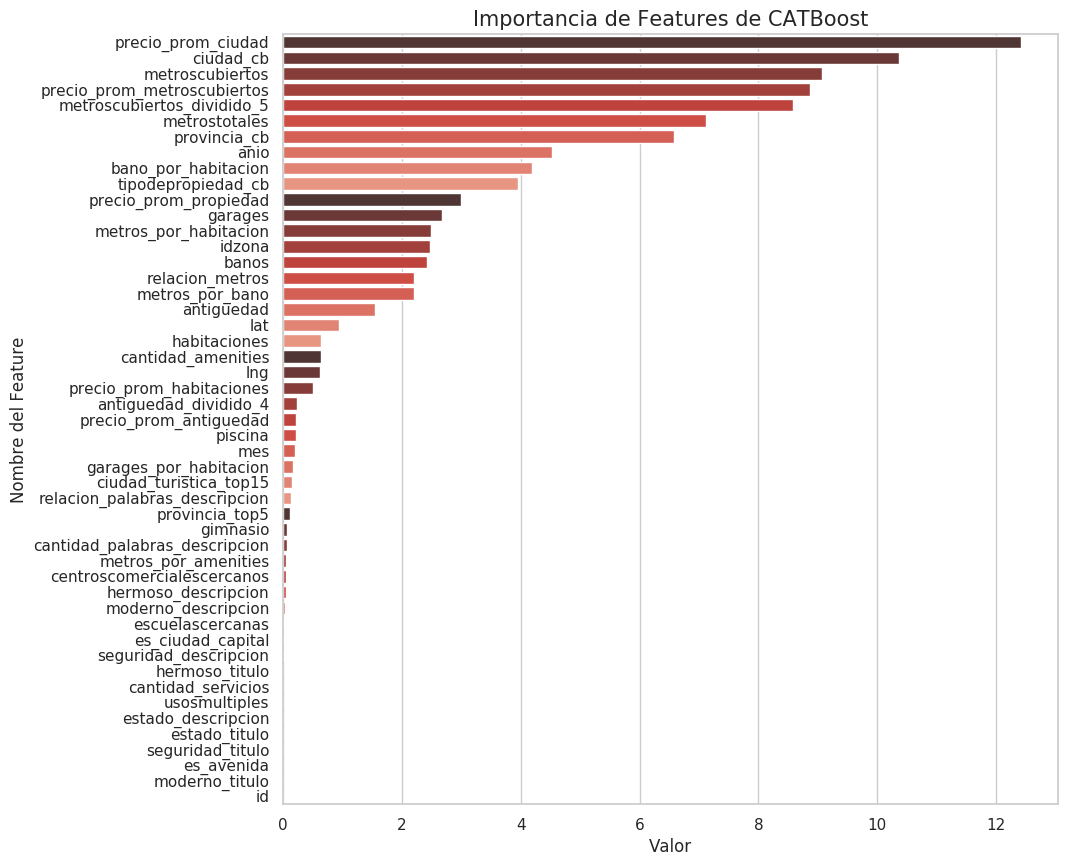

In [21]:
features = pd.DataFrame(index=feature_cols)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features


plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

### Nos quedamos con los k features mas importantes

In [22]:
k=40

features_to_drop = features.nsmallest((df_train.columns.size - k), 'imp').index.tolist()
if 'id' in features_to_drop: features_to_drop.remove('id')
features_to_drop


['es_avenida',
 'moderno_titulo',
 'seguridad_titulo',
 'estado_titulo',
 'estado_descripcion',
 'usosmultiples',
 'cantidad_servicios',
 'hermoso_titulo',
 'seguridad_descripcion']

In [23]:
#Dropeamos los features menos importantes
df_train = df_train.drop(features_to_drop, axis=1)
df_test = df_test.drop(features_to_drop, axis=1)

## Guardamos features

In [24]:
df_train.to_csv('../data/train_con_features_encoded.csv')
df_test.to_csv('../data/test_con_features_encoded.csv')